# Behavior experiments - Figure 4

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns

import statsmodels.api as sm
from scipy.stats import ranksums, ttest_ind

%matplotlib inline

In [19]:
timepoint = [5, 23, 27, 50, 69.5]
bound = [15, 25, 35, 47, 62]
stage_cmap = sns.color_palette("deep",8)
type_cmap = [(253/255, 225/255, 245/255),
             (1, 183/255, 139/255),
             (167/255, 217/255, 245/255)]
cmap = sns.color_palette("deep",8)

In [3]:
smd_df = pd.read_csv("/home/jabae/research/Celegans/Cmito/behavior/230607_turndata_N2_drp1_SMDrescue_buffer.csv", header=None)
smd_df.head()

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
bwm_df = pd.read_csv("/home/jabae/research/Celegans/Cmito/behavior/230713_turndata_N2_drp1_BWMrescue_buffer.csv")
bwm_df.head()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,1,1,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,1,0,1,1,1,0,0,2,0,0,...,0,0,0,1,0,0,1,0,1,0
4,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0


In [43]:
n = smd_df.shape[1]
t = smd_df.shape[0]
wsize = 30
nw = smd_df.shape[0]//wsize

nturn_arr = np.zeros((t-nw,n))
c = 0
for i in range(0,t-nw,1):
    
    nturn_arr[c,:] = np.sum(smd_turndata[i:i+wsize,:], axis=0)
    
    c += 1

xrng = np.arange(t-nw)/60
xrng = xrng
nturn_n2 = nturn_arr[:,:24]
nturn_drp1 = nturn_arr[:,24:48]
nturn_rescue = nturn_arr[:,48:]

n2_mean = np.mean(nturn_n2, axis=1)
n2_low = n2_mean - np.std(nturn_n2, axis=1)/n**0.5
n2_hi = n2_mean + np.std(nturn_n2, axis=1)/n**0.5

drp1_mean = np.mean(nturn_drp1, axis=1)
drp1_low = drp1_mean - np.std(nturn_drp1, axis=1)/n**0.5
drp1_hi = drp1_mean + np.std(nturn_drp1, axis=1)/n**0.5

In [81]:
def plot1(ax):
    
    xticks = np.arange(0,20,2)
    xticklab = ["0","","4","","8","","12","","16",""]
    yticks = np.arange(0,6.5,1)
    yticklab = ["0","","2","","4","","6"]
    
    ax.plot(xrng, np.mean(nturn_n2, axis=1), color=cmap[5],
            linewidth=1, label="N2")
    ax.plot(xrng, np.mean(nturn_drp1, axis=1), color=cmap[6],
            linewidth=1, label="drp-1")
    ax.fill_between(xrng, n2_low, n2_hi, linewidth=0,
                    alpha=0.2, color=cmap[5])
    ax.fill_between(xrng, drp1_low, drp1_hi, linewidth=0,
                    alpha=0.2, color=cmap[6])

    ax.legend(loc="upper right", prop={"family": "Arial", "size": 10})
    ax.set_xlim(0,(t-nw)/60)
    ax.set_ylim(0,6.5)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklab, fontsize=10, fontname="Arial")
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklab, fontsize=10, fontname="Arial")
    ax.set_xlabel("Time (min.)", fontsize=11, fontname="Arial")
    ax.set_ylabel("Number of turns", fontsize=11, fontname="Arial")
    
def plot2(ax):
    
    xticks = np.arange(0,2.1,0.5)
    xticklab = ["0","","1","","2"]
    yticks = np.arange(0,6.5,1)
    yticklab = ["0","","2","","4","","6"]
    
    ax.plot(xrng, np.mean(nturn_n2, axis=1), color=cmap[5],
            linewidth=1, label="N2")
    ax.plot(xrng, np.mean(nturn_drp1, axis=1), color=cmap[6],
            linewidth=1, label="drp-1")
    ax.fill_between(xrng, n2_low, n2_hi, linewidth=0,
                    alpha=0.2, color=cmap[5])
    ax.fill_between(xrng, drp1_low, drp1_hi, linewidth=0,
                    alpha=0.2, color=cmap[6])

    ax.set_xlim(0,2)
    ax.set_ylim(0,6.5)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklab, fontsize=10, fontname="Arial")
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklab, fontsize=10, fontname="Arial")
    ax.set_xlabel("Time (min.)", fontsize=11, fontname="Arial")
    

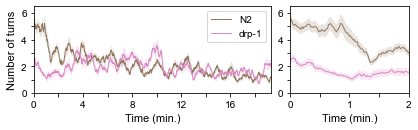

In [85]:
fig =plt.figure(figsize=(5.7,1.7), constrained_layout=True)
gs = fig.add_gridspec(2, 6, wspace=0.05)

ax1 = fig.add_subplot(gs[:2,:4])
plot1(ax1)

ax2 = fig.add_subplot(gs[:2,4:])
plot2(ax2)

plt.savefig("/home/jabae/Dropbox/SNU/Research/Celegans/Cmito/figures/figure_v2/panels/fig4_1.svg")
plt.show()

In [9]:
smd_turndata = smd_df.values

n = smd_df.shape[1]
t = smd_df.shape[0]
wsize = 30
nw = smd_df.shape[0]//wsize

nturn_arr = np.zeros((nw,n))
c = 0
for i in range(nw):
    
    nturn_arr[c,:] = np.sum(smd_turndata[i*wsize:(i+1)*wsize,:], axis=0)
    c += 1
    
smd_nturn_n2 = nturn_arr[:,:24]
smd_nturn_drp1 = nturn_arr[:,24:48]
smd_nturn_rescue = nturn_arr[:,48:]

smd_data = [np.sum(smd_nturn_n2[:4,:], axis=0),
            np.sum(smd_nturn_drp1[:4,:], axis=0),
            np.sum(smd_nturn_rescue[:4,:], axis=0)]

In [10]:
bwm_turndata = bwm_df.values

n = bwm_df.shape[1]
t = bwm_df.shape[0]
wsize = 30
nw = bwm_df.shape[0]//wsize

nturn_arr = np.zeros((nw,n))
c = 0
for i in range(nw):
    
    nturn_arr[c,:] = np.sum(bwm_turndata[i*wsize:(i+1)*wsize,:], axis=0)
    c += 1
    
bwm_nturn_n2 = nturn_arr[:,:32]
bwm_nturn_drp1 = nturn_arr[:,32:64]
bwm_nturn_rescue = nturn_arr[:,64:]

bwm_data = [np.sum(bwm_nturn_n2[:4,:], axis=0),
            np.sum(bwm_nturn_drp1[:4,:], axis=0),
            np.sum(bwm_nturn_rescue[:4,:], axis=0)]

In [88]:
def plot3(ax):
    
    yticks = np.arange(0, 53, 10)
    yticklab = ["0","10","20","30","40","50"]
    
    sns.boxplot(data=bwm_data, whis=[5,95], width=0.6, showfliers=False,
                palette=cmap[5:8], boxprops={"alpha": 0.7})
    sns.stripplot(data=bwm_data, color="k", size=3, alpha=0.6,
                  linewidth=0)

    ax.set_ylim(-1, 53)
    ax.set_xticks([0,1,2], ["N2", "drp-1", "rescue"], fontsize=12)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklab, fontsize=10, fontname="Arial")
    ax.set_ylabel("Number of turns", fontsize=11, fontname="Arial")

def plot4(ax):
    
    yticks = np.arange(0, 53, 10)
    yticklab = ["0","10","20","30","40","50"]
    
    sns.boxplot(data=smd_data, whis=[5,95], width=0.6, showfliers=False,
            palette=cmap[5:8], boxprops={"alpha": 0.7})
    sns.stripplot(data=smd_data, color="k", size=3, alpha=0.6,
                  linewidth=0)
    
    ax.set_ylim(-1, 53)
    ax.set_xticks([0,1,2], ["N2", "drp-1", "rescue"], fontsize=12)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklab, fontsize=10, fontname="Arial")
    ax.set_ylabel("Number of turns", fontsize=11, fontname="Arial")

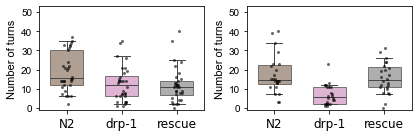

In [89]:
fig =plt.figure(figsize=(5.7,1.8), constrained_layout=True)
gs = fig.add_gridspec(1,2,wspace=0.05)

ax1 = fig.add_subplot(gs[0,0])
plot3(ax1)

ax2 = fig.add_subplot(gs[0,1])
plot4(ax2)

plt.savefig("/home/jabae/Dropbox/SNU/Research/Celegans/Cmito/figures/figure_v2/panels/fig4_2.svg")
plt.show()